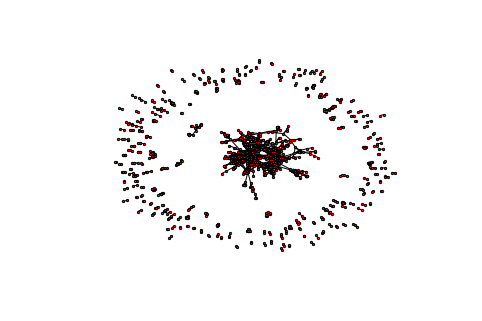

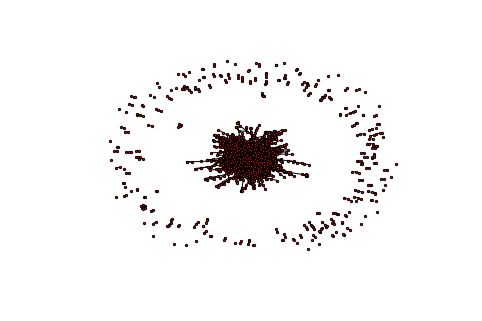

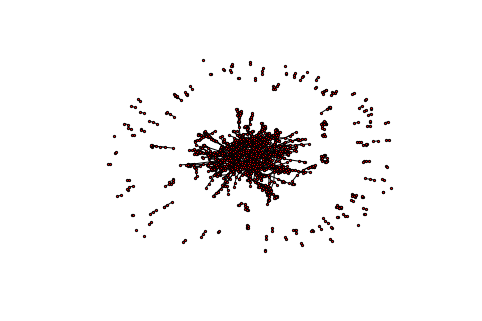

In [1]:
import matplotlib.pylab as plt
import networkx as nx
import numpy as np

def ldata(archive):
    f=open(archive)
    data=[]
    for line in f:
        line=line.strip()
        col=line.split()
        data.append(col)
    return data

a = ldata("yeast_AP-MS.txt")

G = nx.Graph()
G.add_edges_from(a)
nx.draw(G, node_size=5)
plt.show()

b = ldata("yeast_Y2H.txt")

H = nx.Graph()
H.add_edges_from(b)
nx.draw(H, node_size=5)
plt.show()

c = ldata("yeast_LIT.txt")

I = nx.Graph()
I.add_edges_from(c)
nx.draw(I, node_size=5)
plt.show()

In [2]:
an=G.number_of_nodes()
bn=H.number_of_nodes()
cn=I.number_of_nodes()
print("numero de nodos de la red G = "+str(an))
print(bn)
print(cn)

numero de nodos de la red G = 1622
2018
1536


In [3]:
print(G.number_of_edges())
print(H.number_of_edges())
print(I.number_of_edges())

9070
2930
2925


In [5]:
import pandas as pd
import numpy as np
A = nx.to_pandas_adjacency(G)
B=A.transpose()
AN=A.values #convierte pandas a numpy
BN=B.values 
print(np.sum(AN-BN)) 

#es simetrica. la red no es dirigida

A = nx.to_pandas_adjacency(H)
B=A.transpose()
AN=A.values #convierte pandas a numpy
BN=B.values 
print(np.sum(AN-BN))

#es simetrica. la red no es dirigida

A = nx.to_pandas_adjacency(I)
B=A.transpose()
AN=A.values #convierte pandas a numpy
BN=B.values 
print(np.sum(AN-BN))

#es simetrica. la red no es dirigida

0.0
0.0
0.0


In [31]:
f=G.degree #degreeview es un "iterable". se puede iterar con por ejemplo un for
#print(f)
#print(type(f))
#f['YNR046W']

grados = []
for pares in f:
    grados.append(pares[1])

grados_array=np.asarray(grados)
grados_media=np.mean(grados_array)
#print(grados_media)


#forma mas canchera

grados_2 = [gra for (nom,gra) in G.degree()] # [lo_que_quiero  for los_elementos in iterable]

grados_media=np.mean(np.asarray(grados_2))

print('<k>='+str(grados_media))


grados_max=np.max(grados_array)
print('k_max='+str(grados_max))
grados_min=np.min(grados_array)
print('k_min='+str(grados_min))


e=G.number_of_edges()
N=G.number_of_nodes()
densidad=2*e/(N*(N-1))
print('densidad='+str(densidad))


<class 'networkx.classes.reportviews.DegreeView'>
<k>=11.1837237978
k_max=127
k_min=1
densidad=0.006899274397150227


hola
CPU times: user 0 ns, sys: 4 ms, total: 4 ms
Wall time: 1.14 ms


In [89]:
%%time

t=nx.triangles(G)
#print(t)

av=nx.average_clustering(G)
print('<Clocal>='+str(av))

tr=nx.transitivity(G)
print('<Cglobal>='+str(tr))
      
      
cl=nx.clustering(G)
#print(cl)
#print(type(cl))
#print(cl['YFL037W'])

clista = [ci for ci in cl] # [lo_que_quiero  for los_elementos in iterable]
#print(clista)
#print(clista[2])

ci=[]
for i in clista:
    ci.append(cl[i])
cmedia=np.mean(np.asarray(ci))
print(cmedia)

#clv=cl.values()
#clva=np.asarray(clv)
#print(type(clva))
#print(clva)
#print(clva[0])
#clust_media=np.mean(clva)

A = nx.to_pandas_adjacency(G)
AN=A.values #convierte pandas a numpy


AN=AN[0:100,0:100]

Li=[]
Ltriang=[]
for i in range(len(AN)):
    Lint=0
    Lint_triang=0
    for j in range(len(AN)):
        for k in range(len(AN)):
            if i!=k and i!=j and j!=k:
                Lint+=AN[i,j]*AN[i,k]
                Lint_triang+=AN[i,j]*AN[i,k]*AN[j,k]
    Li.append(Lint)
    Ltriang.append(Lint_triang)
#print(Li)
#print(Ltriang)

#el codigo tarda una hr

Cg_triang=np.sum(np.asarray(Ltriang))/np.sum(np.asarray(Li))

print(Cg_triang)
Gcorto=nx.from_pandas_adjacency(A.iloc[0:100,0:100])
tr=nx.transitivity(Gcorto)
print(tr)

#BN=np.matmul(AN,AN)


<Clocal>=0.5546360657013013
<Cglobal>=0.6185901626483971
0.554636065701
0.493670886076
0.4936708860759494
CPU times: user 2.36 s, sys: 4 ms, total: 2.36 s
Wall time: 2.36 s


In [108]:
Gg=list(nx.connected_components(G))
#print(Gg)
largest_cc = max(nx.connected_components(G), key=len)
#diam=nx.diameter(Gg)
#print(largest_cc)
print(G)
type(largest_cc)

set

In [77]:
vector = [(1,2),(3,4),(5,6)]
vec_2 = [i*8 for (i,j) in vector]
G.degree()

DegreeView({'YNR046W': 2, 'YJL026W': 2, 'YOR063W': 127, 'YLR139C': 1, 'YJR065C': 6, 'YLL010C': 1, 'YLR423C': 3, 'YPL231W': 1, 'YEL051W': 7, 'YJR077C': 6, 'YNL059C': 11, 'YDR472W': 9, 'YKL148C': 1, 'YML072C': 1, 'YKR068C': 9, 'YPL016W': 8, 'YHR121W': 2, 'YJL190C': 75, 'YDR244W': 1, 'YDR179C': 5, 'YFR015C': 1, 'YNL005C': 26, 'YPR023C': 18, 'YER081W': 1, 'YBR136W': 2, 'YOL145C': 10, 'YLR321C': 15, 'YKL152C': 4, 'YDR238C': 7, 'YCL032W': 1, 'YLR447C': 4, 'YOL067C': 1, 'YMR263W': 10, 'YLR264W': 3, 'YGR200C': 5, 'YDL055C': 1, 'YNL113W': 22, 'YPL045W': 6, 'YPL249C': 2, 'YNL244C': 7, 'YDR174W': 2, 'YPL023C': 1, 'YDR404C': 16, 'YPR182W': 18, 'YCL054W': 11, 'YPL042C': 23, 'YFL024C': 13, 'YNL302C': 14, 'YER129W': 4, 'YDR165W': 1, 'YKR006C': 21, 'YPR162C': 5, 'YNL215W': 8, 'YOL054W': 8, 'YGL011C': 14, 'YLR398C': 3, 'YBR247C': 26, 'YLR215C': 1, 'YMR142C': 43, 'YPR093C': 2, 'YBR055C': 38, 'YGR220C': 19, 'YKR021W': 1, 'YAL043C': 15, 'YHL034C': 19, 'YGL245W': 5, 'YJL146W': 1, 'YIL144W': 3, 'YMR290C': 8

In [2]:
import matplotlib.pylab as plt
import pandas as pd
import networkx as nx

a=pd.read_csv("yeast_AP-MS.txt", delimiter="\t", names=["p1","p2"],header=None)
#b=nx.from_pandas_edgelist(a)


/usr/local/lib/python3.5/dist-packages/pandas/core/computation/__init__.py:18: UserWarning: The installed version of numexpr 2.4.3 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


In [ ]:
a.head()

for ix,row in a.iterrows():
    print(row.values)